Подготовка библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy.stats import norm, shapiro
from scipy import stats
from pandas import DataFrame
%matplotlib inline

Подготовка данных

- Сколько данных в датасете? -- 1460 строк
- Сколько параметров? Выведите список всех параметров. -- 79
- Есть ли категориальные признаки? Перечислите / выведите их.
- Выведите первые пять строчек DataFrame.

In [ ]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('/content/drive/MyDrive/ml data/house_train.csv')
df.drop('Id', axis=1, inplace=True)

# первые 5 строк
df.head()

# список категориальных параметров
df.select_dtypes(include=['object']).columns.tolist()

# список всех параметров
# df.info()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Описательная статистика числовых данных

In [ ]:
df.describe()

# транспонирует статистику df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


– получим статистику отдельного показателя, например, "SalePrice":

Укажите:
- чему равно среднее значение? 180921.2
- чему равно стандартное отклонение? 79442.5


In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Проверьте, есть ли пропуски и повторы в данных


In [ ]:
# пропуски
na_number = df.isna().sum()
print(na_number)

# повторы
print(f"\nПовторы: {df.duplicated().sum()}")

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Повторы: 0


Cписок названий столбцов

In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Выясним, в каких параметрах отсутствует статистика

In [ ]:
na_count = df.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df)
na_data = pd.concat([na_count, na_rate],axis=1,keys=['count','ratio'])
print(na_data)

             count     ratio
PoolQC        1453  0.995205
MiscFeature   1406  0.963014
Alley         1369  0.937671
Fence         1179  0.807534
FireplaceQu    690  0.472603
...            ...       ...
Heating          0  0.000000
HeatingQC        0  0.000000
MSZoning         0  0.000000
1stFlrSF         0  0.000000
SalePrice        0  0.000000

[80 rows x 2 columns]


Удалим столбцы с максимальным количеством отсутствующих данных

In [ ]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Удалим оставшиеся незначительные столбцы

In [ ]:
df = df.drop(['GarageQual', 'GarageCond', 'Fence'], axis=1)
df = df.drop(['MasVnrArea', 'MasVnrType'], axis=1)
print(df.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 72, dtype: int64


Построим гистограмму параметра SalePrice

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


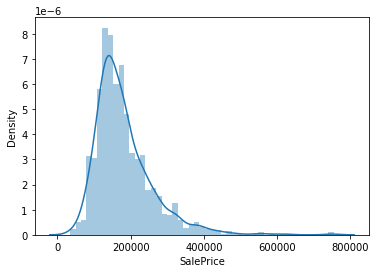

In [ ]:
sb.distplot(df['SalePrice'])

По рисунку:
- цена дома подчиняется нормальному распределению? Проверьте эту гипотезу

In [ ]:
stat, p = shapiro(df['SalePrice'])
print(stat, p)

0.869671642780304 3.206247534576162e-33


`p` значительно меньше `α` (обычно 0.05), => данные не подчиняются нормальному распределению

Постройте гистограмму параметра SalePrice всех домов c заголовком
'Histogram of Sale Price', заголовок оси х – 'price', заголовок оси у
– 'count'.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


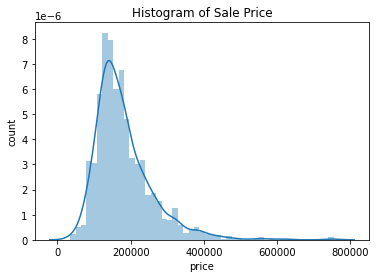

In [ ]:
sb.distplot(df['SalePrice'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('Histogram of Sale Price')
plt.show()

Построить коробочную диаграмму (ящик с усами) признака SalePrice всех
домов в данных.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


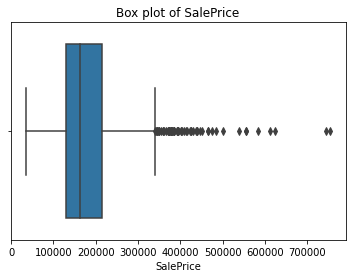

In [ ]:
plt.title('Box plot of SalePrice')
sb.boxplot(df['SalePrice'], orient='v')

Выведем описательную статистику 'CentralAir' и 'SalePrice' с
помощью инструкции:

In [ ]:
df.groupby('CentralAir')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


Общая таблица частот параметров

In [ ]:
x = df.OverallQual.value_counts()
x/x.sum()

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

Таблица частот размеров гаража
- Гаражи какого размера наиболее распространены? -- 2местные

In [ ]:
x = df.GarageCars.value_counts()
x/x.sum()

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

Таблица частот центрального кондиционирования

In [ ]:
x = df.CentralAir.value_counts()
x/x.sum()

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

Рассчитайте долю домов с продажной ценой между 25-м процентилем (129975)
и 75-м процентилем (214000).


In [ ]:
print('The proportion of the houses with prices between 25th percentile and 75th percentile: ', np.mean((df.SalePrice >= 129975) & (df.SalePrice <= 214000)))

The proportion of the houses with prices between 25th percentile and 75th percentile:  0.5020547945205479


Рассчитайте долю домов с общей площадью в квадратных футах от 25-го
процентиля (795,75) до 75-го процентиля (1298,25).

In [ ]:
print('The proportion of house with total square feet of basement area between 25th percentile and 75th percentile: ', np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)))

The proportion of house with total square feet of basement area between 25th percentile and 75th percentile:  0.5


Наконец, мы рассчитаем долю домов на основе любых условий. Поскольку
некоторые дома соответствуют обоим критериям, приведенная ниже пропорция
меньше суммы двух пропорций, рассчитанных выше.

In [ ]:
a = (df.SalePrice >= 129975) & (df.SalePrice <= 214000)
b = (df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)
print(np.mean(a | b))

0.7143835616438357


Создадим новый столбец HouseAge (YearBuilt), затем разделим данные на части
HouseAge и построим параллельные боксовые диаграммы цены продажи внутри
каждой страты.

Вопрос: Сравните возраст дома и среднюю цену на него. Какая наблюдается
закономерность?
- чем старше дом, тем меньше стоимость

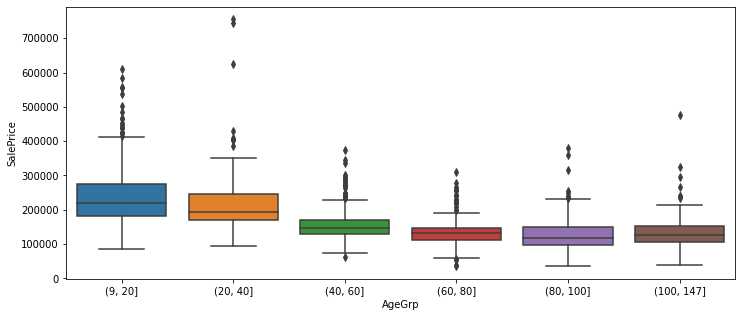

In [ ]:
df['HouseAge'] = 2019 - df['YearBuilt']
df["AgeGrp"] = pd.cut(df.HouseAge, [9, 20, 40, 60, 80, 100, 147]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))
sb.boxplot(x="AgeGrp", y="SalePrice", data=df)

Из построенных по приведенному ниже коду
графиков 
сделайте вывод: какие по возрасту дома более оснащены
кондиционерами.

- у более новых домов в основном присутствует кондиционирование

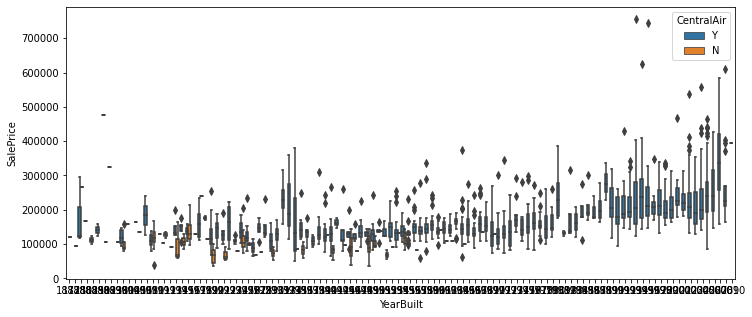

In [ ]:
plt.figure(figsize=(12, 5))
sb.boxplot(x="YearBuilt", y="SalePrice", hue="CentralAir", data=df)
plt.show()

Построим диаграммы рассеяния, отражающие взаимосвязь между
переменными

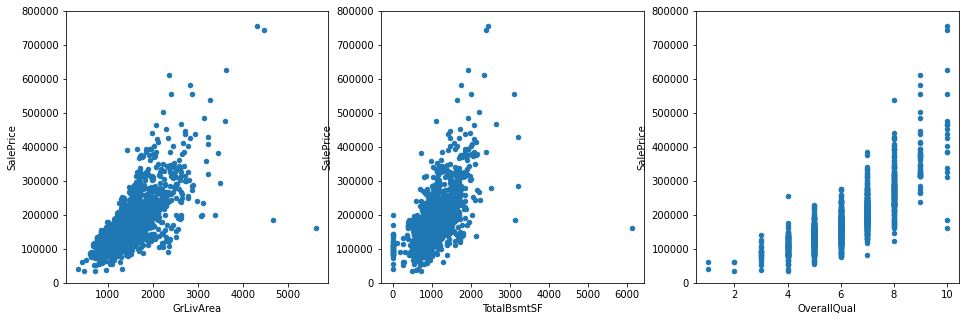

In [ ]:
output,var,var1,var2 = 'SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual'
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(16,5))
df.plot.scatter(x=var,y=output,ylim=(0,800000),ax=axes[0])
df.plot.scatter(x=var1,y=output,ylim=(0,800000),ax=axes[1])
df.plot.scatter(x=var2,y=output,ylim=(0,800000),ax=axes[2])

Отображение прямоугольной диаграммой

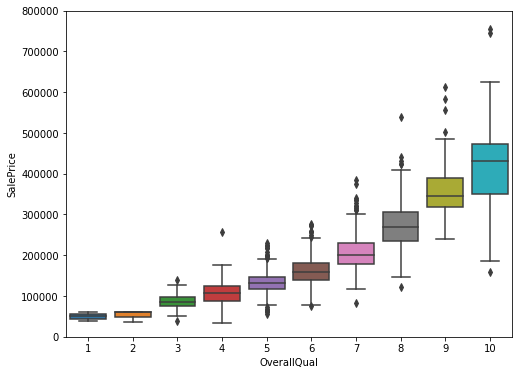

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sb.boxplot(x=var2,y=output,data=df)
ax.set_ylim(0,800000)
plt.show()

Между какими параметрами построен boxplot? Есть ли выбросы в данных?
между `OverallQual` и `SalePrice`

Рассмотрите эффект, нарисованный seaborn

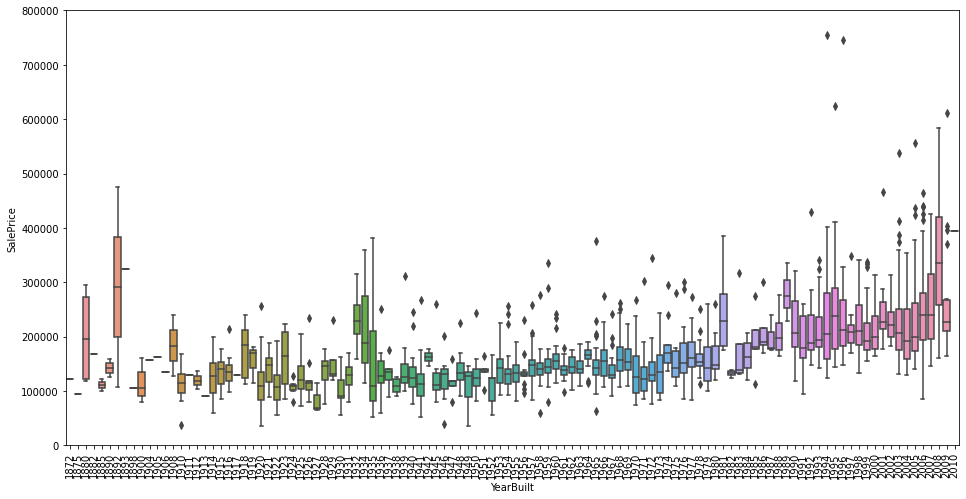

In [ ]:
var3 = 'YearBuilt'
fig, ax = plt.subplots(figsize=(16,8))
sb.boxplot(x=var3,y=output,data=df)
ax.set_ylim(0,800000)
plt.xticks(rotation=90)
plt.show()

Получите ковариационную матрицу для всех данных DataFrame и используйте
анализ тепловой карты

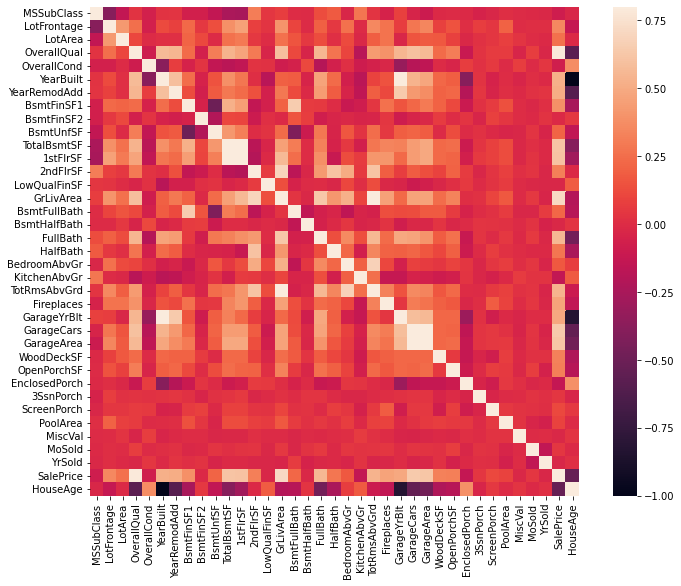

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax = .8, square = True, ax = ax) 
# Параметр square гарантирует, что когда corrmat - неквадратная матрица, общий вывод графика по-прежнему будет квадратным
plt.show()

выберем 10 параметров с наибольшей корреляцией с SalePrice,
чтобы проанализировать корреляцию между ними.


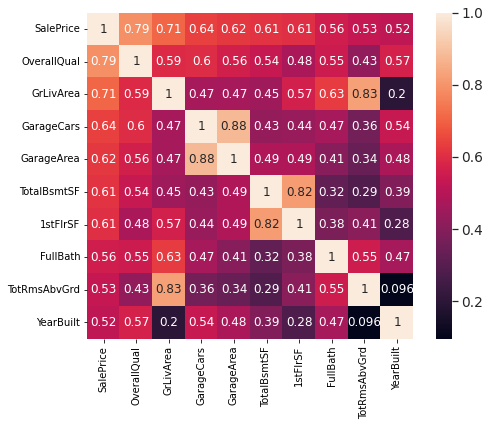

In [ ]:
k = 10
top10_attr = corrmat.nlargest(k, output).index
top10_mat = corrmat.loc[top10_attr, top10_attr]
fig,ax = plt.subplots(figsize=(8,6))
sb.set(font_scale=1.25)
sb.heatmap(top10_mat, annot=True, annot_kws={'size':12}, square=True)
# Установка аннотацию для отображения чисел в маленьких ячейках и annot_kws для настройки числового формата
plt.show()

матрица графиков, образованная комбинациями между каждыми двумя параметрами

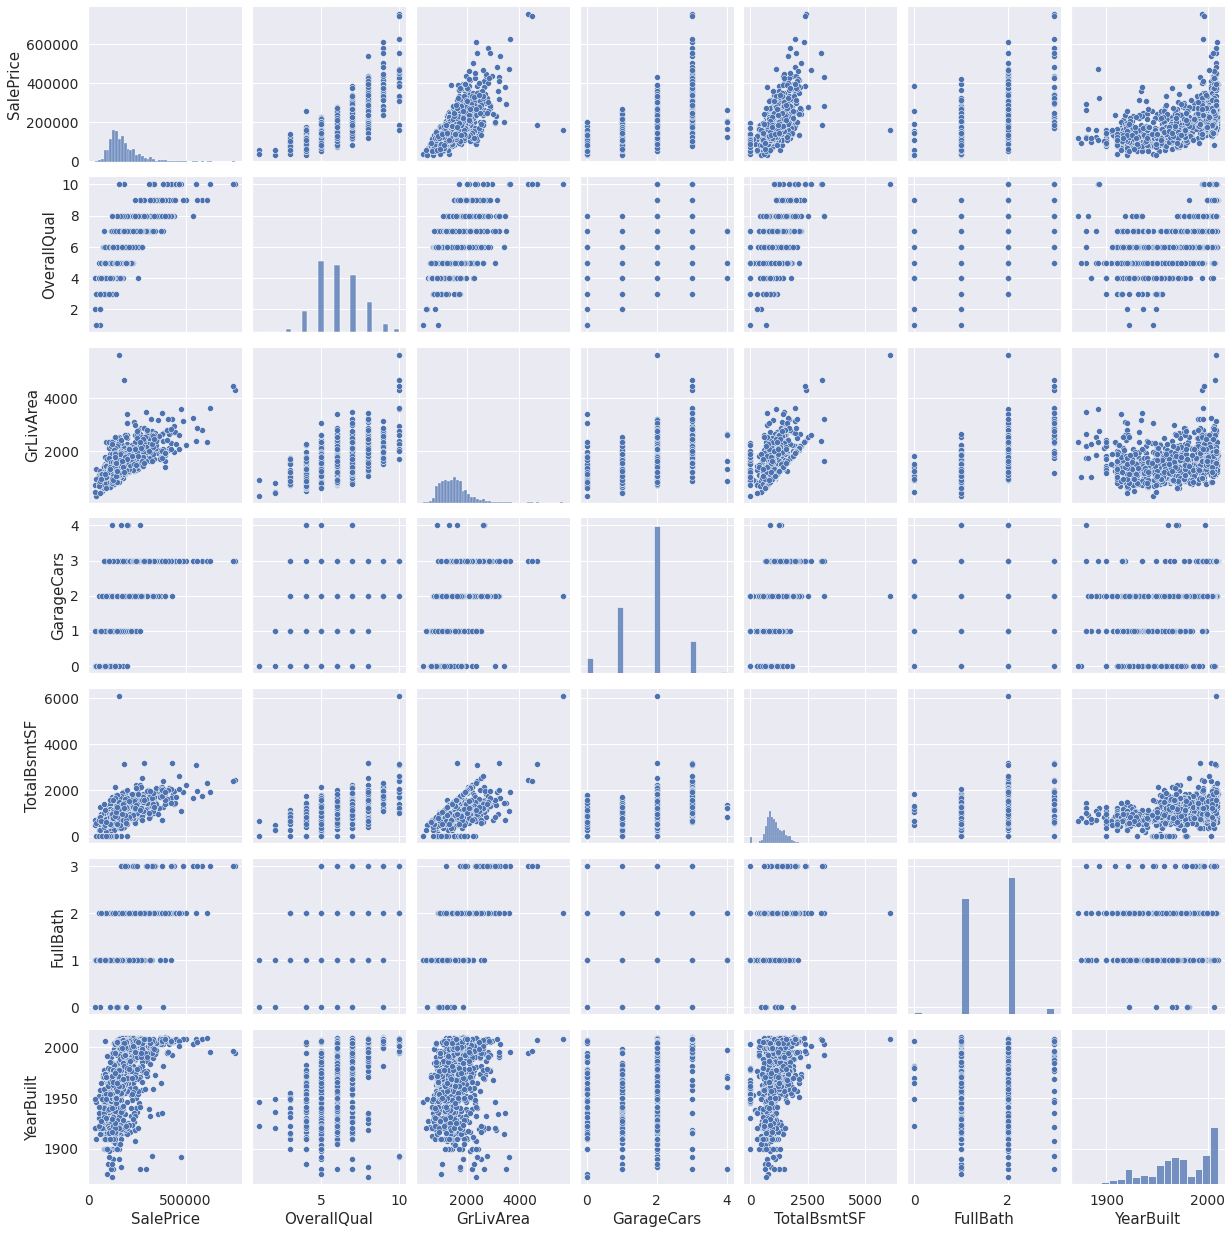

In [ ]:
var_set = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sb.set(font_scale = 1.25) # Устанавливаем размер шрифта по горизонтальной и вертикальной оси
sb.pairplot (df[var_set]) # 7 * 7 графическая матрица
plt.show()